# All imports #

In [2]:
from __future__ import print_function

import sys, os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
import tensorflow.keras
import pandas as pd
import numpy as np
import sklearn
import keras
import csv

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input

from keras_uncertainty.models import MCDropoutClassifier, MCDropoutRegressor
from keras_uncertainty.utils import numpy_regression_nll
from keras_uncertainty.models import DeepEnsembleRegressor, deep_ensemble_regression_nll_loss, SimpleEnsemble



/home/dfki.uni-bremen.de/bmanickavasakan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dfki.uni-bremen.de/bmanickavasakan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dfki.uni-bremen.de/bmanickavasakan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/d

In [3]:
def load_joint_space_csv_chunks(file_path):
    data_frame = pd.read_csv(file_path, skiprows=1, header=None)
    del data_frame[18]
    return data_frame

def load_task_space_csv_chunks(file_path):
    return pd.read_csv(file_path, skiprows=1, header=None)


In [4]:
##please select the appropriate folder, willl use os.path.join() for completed script
TRAIN_FOLDER = '/home/dfki.uni-bremen.de/bmanickavasakan/newdataset_rh5_leg/leg_5steps/'
TEST_FOLDER = '/home/dfki.uni-bremen.de/bmanickavasakan/newdataset_rh5_leg/leg_5steps/test_4steps'

X_TRAIN_FILE = os.path.join(TRAIN_FOLDER, 'leg_forwardkinematics_x.csv')
Q_TRAIN_FILE = os.path.join(TRAIN_FOLDER, 'leg_sysstate_q.csv')
x_train = load_task_space_csv_chunks(X_TRAIN_FILE)
q_train = load_joint_space_csv_chunks(Q_TRAIN_FILE)

X_TEST_FILE = os.path.join(TEST_FOLDER, 'leg_forwardkinematics_x.csv')
Q_TEST_FILE = os.path.join(TEST_FOLDER, 'leg_sysstate_q.csv')
x_test = load_task_space_csv_chunks(X_TEST_FILE)
q_test = load_joint_space_csv_chunks(Q_TEST_FILE)

In [5]:
df = pd.DataFrame(np.random.randn(5, 2), columns=['A', 'B'])
m = np.sign(df) >= 0
df['Truth'] = m.all(axis=1).astype(int)
print(df)
print(m)
print(df['Truth'])

df_2 = pd.DataFrame()

df_2 = df[df['Truth'] == 1]
print(df_2)


          A         B  Truth
0  0.686344  0.130116      1
1 -0.995629 -0.830588      0
2  1.244207  0.204256      1
3 -0.578212 -0.546510      0
4 -0.021496  0.062845      0
       A      B
0   True   True
1  False  False
2   True   True
3  False  False
4  False   True
0    1
1    0
2    1
3    0
4    0
Name: Truth, dtype: int64
          A         B  Truth
0  0.686344  0.130116      1
2  1.244207  0.204256      1


# Splitting the dataset with SD #

In [8]:
'''


'''

x_train_df = pd.DataFrame(x_train)
q_train_df = pd.DataFrame(q_train)
x_test_df = pd.DataFrame(x_test)
q_test_df = pd.DataFrame(q_test)

m = np.sign(q_train_df) >= 0
q_train_df['IOD'] = m.all(axis=1).astype(int)
print(q_train_df[q_train_df['IOD'] == 1])

'''
InDistribution_Q_Train = 
OutDistribution_Q_Train =
InDistribution_X_Train = 
OutDistribution_X_Train =

InDistribution_Q_Test = 
OutDistribution_Q_Test =
InDistribution_X_Test = 
OutDistribution_X_Test =

x_train_1 = InDistribution_X_Train
q_train_1 = InDistribution_Q_Train
x_test_1 = InDistribution_X_Test
q_test_1 = InDistribution_Q_Test

OOD_x_train = OutDistribution_X_Train
OOD_q_train = OutDistribution_Q_Train
OOD_x_test = OutDistribution_X_Test
OOD_q_test = OutDistribution_Q_Test

print("//////////////////////")
print(x_train_1.shape, OOD_x_train.shape, x_test_1.shape, OOD_x_test.shape)
'''

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, IOD]
Index: []


'\nInDistribution_Q_Train = \nOutDistribution_Q_Train =\nInDistribution_X_Train = \nOutDistribution_X_Train =\n\nInDistribution_Q_Test = \nOutDistribution_Q_Test =\nInDistribution_X_Test = \nOutDistribution_X_Test =\n\nx_train_1 = InDistribution_X_Train\nq_train_1 = InDistribution_Q_Train\nx_test_1 = InDistribution_X_Test\nq_test_1 = InDistribution_Q_Test\n\nOOD_x_train = OutDistribution_X_Train\nOOD_q_train = OutDistribution_Q_Train\nOOD_x_test = OutDistribution_X_Test\nOOD_q_test = OutDistribution_Q_Test\n\nprint("//////////////////////")\nprint(x_train_1.shape, OOD_x_train.shape, x_test_1.shape, OOD_x_test.shape)\n'

In [5]:

x_scaler = MinMaxScaler()
q_scaler = MinMaxScaler()

#In order training set
x_train_1 = x_scaler.fit_transform(x_train_1)
q_train_1 = q_scaler.fit_transform(q_train_1)

#complete test set
x_test = x_scaler.transform(x_test)
q_test = q_scaler.transform(q_test)

#split testing data
IOD_x_test = x_scaler.transform(x_test_1)
IOD_q_test = q_scaler.transform(q_test_1)

OOD_x_test = x_scaler.transform(OOD_x_test)
OOD_q_test = q_scaler.transform(OOD_q_test)

In [67]:
print(IOD_x_test[0])

[8.88403205e-01 6.52137067e-01 6.71030535e-01 4.60491315e-01
 3.23972785e-02 3.98426058e-01 4.34750101e-01 2.35521144e-04
 7.25466835e-04]


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4096 samples in 0.002s...
[t-SNE] Computed neighbors for 4096 samples in 0.219s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4096
[t-SNE] Computed conditional probabilities for sample 2000 / 4096
[t-SNE] Computed conditional probabilities for sample 3000 / 4096
[t-SNE] Computed conditional probabilities for sample 4000 / 4096
[t-SNE] Computed conditional probabilities for sample 4096 / 4096
[t-SNE] Mean sigma: 0.408712
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.621536
[t-SNE] KL divergence after 300 iterations: 1.617611


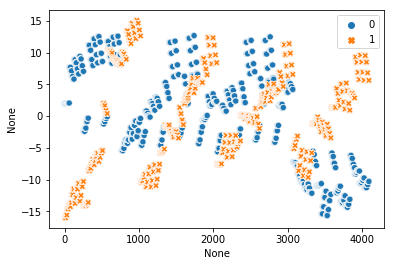

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(q_test)
df_result = pd.DataFrame()
df_result[0] = tsne_results[:,0]
df_result[1] = tsne_results[:,1]

plt.figure()
sns.scatterplot(data=df_result)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3840 samples in 0.006s...
[t-SNE] Computed neighbors for 3840 samples in 0.277s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3840
[t-SNE] Computed conditional probabilities for sample 2000 / 3840
[t-SNE] Computed conditional probabilities for sample 3000 / 3840
[t-SNE] Computed conditional probabilities for sample 3840 / 3840
[t-SNE] Mean sigma: 0.406737
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.782204
[t-SNE] KL divergence after 300 iterations: 1.571091


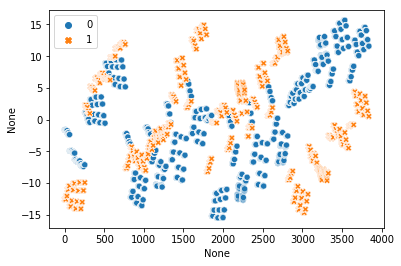

In [48]:
tsne_results = tsne.fit_transform(IOD_q_test)
df_result_1 = pd.DataFrame()
df_result_1[0] = tsne_results[:,0]
df_result_1[1] = tsne_results[:,1]

plt.figure()
sns.scatterplot(data=df_result_1)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 256 samples in 0.001s...
[t-SNE] Computed neighbors for 256 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 256 / 256
[t-SNE] Mean sigma: 0.471318
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.740833
[t-SNE] KL divergence after 300 iterations: 0.651772


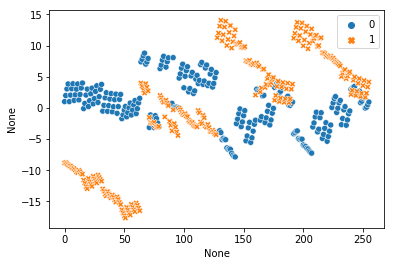

In [49]:
tsne_results = tsne.fit_transform(OOD_q_test)
df_result_2 = pd.DataFrame()
df_result_2[0] = tsne_results[:,0]
df_result_2[1] = tsne_results[:,1]

plt.figure()
sns.scatterplot(data=df_result_2)

In [57]:

def model_builder():
    input_shape = 9
    output_shape = 18
    depth = 6
    width = 64
    reduction_factor = 1.1
    for i in range(depth):
        num_neurons = max(int(width * (reduction_factor ** i)), 4)
        if i == 0:
            inp = Input(shape=(input_shape,))
            x = Dense(num_neurons, activation='relu')(inp)
        else:
            x = Dense(num_neurons, activation='relu')(x)
            
    mean = Dense(output_shape, activation="sigmoid")(x)
    var = Dense(output_shape, activation="softplus")(x)
    
    train_model = Model(inp, mean)
    pred_model = Model(inp, [mean, var])

    train_model.compile(loss=deep_ensemble_regression_nll_loss(var), optimizer="adam", metrics=["mae"])
    return train_model, pred_model

In [58]:


model = model_builder

print(type(model))

<class 'function'>


In [59]:


with tf.device('/cpu:0'):
    ensemble_model = DeepEnsembleRegressor(model_builder, 3)
    ensemble_model.fit(x_train_1, q_train_1, epochs = 200, batch_size = 128, verbose = 1, validation_data=(IOD_x_test, IOD_q_test))

Train on 13750 samples, validate on 3840 samples
Epoch 1/200
13750/13750 [==============================] - 1s 97us/sample - loss: -0.5330 - mean_absolute_error: 0.2693 - val_loss: -0.6961 - val_mean_absolute_error: 0.2557
Epoch 2/200
13750/13750 [==============================] - 1s 38us/sample - loss: -0.9056 - mean_absolute_error: 0.2172 - val_loss: -1.0564 - val_mean_absolute_error: 0.2057
Epoch 3/200
13750/13750 [==============================] - 1s 39us/sample - loss: -1.0987 - mean_absolute_error: 0.1922 - val_loss: -1.2095 - val_mean_absolute_error: 0.1861
Epoch 4/200
13750/13750 [==============================] - 1s 39us/sample - loss: -1.2686 - mean_absolute_error: 0.1729 - val_loss: -1.3595 - val_mean_absolute_error: 0.1673
Epoch 5/200
13750/13750 [==============================] - 1s 39us/sample - loss: -1.3367 - mean_absolute_error: 0.1624 - val_loss: -1.4921 - val_mean_absolute_error: 0.1589
Epoch 6/200
13750/13750 [==============================] - 1s 38us/sample - loss:

Epoch 94/200
13750/13750 [==============================] - 1s 38us/sample - loss: -3.1195 - mean_absolute_error: 0.0288 - val_loss: -0.9744 - val_mean_absolute_error: 0.0416
Epoch 95/200
13750/13750 [==============================] - 1s 37us/sample - loss: -3.1290 - mean_absolute_error: 0.0283 - val_loss: -1.5064 - val_mean_absolute_error: 0.0413
Epoch 96/200
13750/13750 [==============================] - 1s 39us/sample - loss: -3.1352 - mean_absolute_error: 0.0282 - val_loss: -1.5919 - val_mean_absolute_error: 0.0405
Epoch 97/200
13750/13750 [==============================] - 1s 36us/sample - loss: -3.1623 - mean_absolute_error: 0.0279 - val_loss: -0.9726 - val_mean_absolute_error: 0.0408
Epoch 98/200
13750/13750 [==============================] - 1s 38us/sample - loss: -3.1639 - mean_absolute_error: 0.0280 - val_loss: -0.8187 - val_mean_absolute_error: 0.0395
Epoch 99/200
13750/13750 [==============================] - 1s 37us/sample - loss: -3.1701 - mean_absolute_error: 0.0276 - va

13750/13750 [==============================] - 1s 38us/sample - loss: -3.0350 - mean_absolute_error: 0.0283 - val_loss: 12.4323 - val_mean_absolute_error: 0.0390
Epoch 187/200
13750/13750 [==============================] - 1s 38us/sample - loss: -3.4902 - mean_absolute_error: 0.0222 - val_loss: 31.2965 - val_mean_absolute_error: 0.0397
Epoch 188/200
13750/13750 [==============================] - 1s 39us/sample - loss: -3.4572 - mean_absolute_error: 0.0229 - val_loss: 24.3148 - val_mean_absolute_error: 0.0403
Epoch 189/200
13750/13750 [==============================] - 1s 38us/sample - loss: -3.1994 - mean_absolute_error: 0.0256 - val_loss: 33.6873 - val_mean_absolute_error: 0.0388
Epoch 190/200
13750/13750 [==============================] - 1s 37us/sample - loss: -3.4956 - mean_absolute_error: 0.0222 - val_loss: 32.4760 - val_mean_absolute_error: 0.0380
Epoch 191/200
13750/13750 [==============================] - 1s 36us/sample - loss: -3.4854 - mean_absolute_error: 0.0224 - val_loss: 

Epoch 79/200
13750/13750 [==============================] - 1s 38us/sample - loss: -3.0674 - mean_absolute_error: 0.0302 - val_loss: 1.9565 - val_mean_absolute_error: 0.0386
Epoch 80/200
13750/13750 [==============================] - 1s 37us/sample - loss: -2.9961 - mean_absolute_error: 0.0304 - val_loss: 1.4994 - val_mean_absolute_error: 0.0365
Epoch 81/200
13750/13750 [==============================] - 1s 38us/sample - loss: -3.1073 - mean_absolute_error: 0.0294 - val_loss: 2.1151 - val_mean_absolute_error: 0.0382
Epoch 82/200
13750/13750 [==============================] - 1s 37us/sample - loss: -3.1344 - mean_absolute_error: 0.0288 - val_loss: 2.8295 - val_mean_absolute_error: 0.0375
Epoch 83/200
13750/13750 [==============================] - 1s 39us/sample - loss: -3.1430 - mean_absolute_error: 0.0288 - val_loss: 2.3437 - val_mean_absolute_error: 0.0394
Epoch 84/200
13750/13750 [==============================] - 1s 38us/sample - loss: -3.1251 - mean_absolute_error: 0.0291 - val_los

Epoch 126/200
13750/13750 [==============================] - 1s 37us/sample - loss: -3.2911 - mean_absolute_error: 0.0259 - val_loss: 11.9719 - val_mean_absolute_error: 0.0358
Epoch 127/200
13750/13750 [==============================] - 1s 38us/sample - loss: -3.2437 - mean_absolute_error: 0.0262 - val_loss: 7.4512 - val_mean_absolute_error: 0.0369
Epoch 128/200
13750/13750 [==============================] - 1s 38us/sample - loss: -3.2819 - mean_absolute_error: 0.0259 - val_loss: 10.8297 - val_mean_absolute_error: 0.0355
Epoch 129/200
13750/13750 [==============================] - 1s 38us/sample - loss: -3.3089 - mean_absolute_error: 0.0259 - val_loss: 12.4117 - val_mean_absolute_error: 0.0350
Epoch 130/200
13750/13750 [==============================] - 1s 38us/sample - loss: -3.2744 - mean_absolute_error: 0.0257 - val_loss: 8.2255 - val_mean_absolute_error: 0.0364
Epoch 131/200
13750/13750 [==============================] - 1s 38us/sample - loss: -3.3009 - mean_absolute_error: 0.0259 

13750/13750 [==============================] - 1s 38us/sample - loss: -1.9468 - mean_absolute_error: 0.1287 - val_loss: 11.1109 - val_mean_absolute_error: 0.1361
Epoch 19/200
13750/13750 [==============================] - 1s 39us/sample - loss: -1.9598 - mean_absolute_error: 0.1276 - val_loss: 19.0105 - val_mean_absolute_error: 0.1333
Epoch 20/200
13750/13750 [==============================] - 1s 39us/sample - loss: -1.9799 - mean_absolute_error: 0.1265 - val_loss: 17.3469 - val_mean_absolute_error: 0.1324
Epoch 21/200
13750/13750 [==============================] - 1s 37us/sample - loss: -1.8178 - mean_absolute_error: 0.1298 - val_loss: 13.6076 - val_mean_absolute_error: 0.1309
Epoch 22/200
13750/13750 [==============================] - 1s 37us/sample - loss: -2.0047 - mean_absolute_error: 0.1259 - val_loss: 18.2674 - val_mean_absolute_error: 0.1305
Epoch 23/200
13750/13750 [==============================] - 1s 39us/sample - loss: -1.5062 - mean_absolute_error: 0.1388 - val_loss: -1.74

Epoch 65/200
13750/13750 [==============================] - 1s 38us/sample - loss: -2.3690 - mean_absolute_error: 0.0730 - val_loss: 13.2927 - val_mean_absolute_error: 0.0764
Epoch 66/200
13750/13750 [==============================] - 1s 38us/sample - loss: -2.6057 - mean_absolute_error: 0.0699 - val_loss: 20.0967 - val_mean_absolute_error: 0.0771
Epoch 67/200
13750/13750 [==============================] - 1s 39us/sample - loss: -2.6191 - mean_absolute_error: 0.0691 - val_loss: 22.1682 - val_mean_absolute_error: 0.0771
Epoch 68/200
13750/13750 [==============================] - 1s 37us/sample - loss: -2.6158 - mean_absolute_error: 0.0688 - val_loss: 26.4931 - val_mean_absolute_error: 0.0759
Epoch 69/200
13750/13750 [==============================] - 1s 37us/sample - loss: -2.6218 - mean_absolute_error: 0.0682 - val_loss: 23.7262 - val_mean_absolute_error: 0.0754
Epoch 70/200
13750/13750 [==============================] - 1s 38us/sample - loss: -2.6517 - mean_absolute_error: 0.0671 - va

Epoch 112/200
13750/13750 [==============================] - 1s 39us/sample - loss: -2.9099 - mean_absolute_error: 0.0480 - val_loss: 30.1729 - val_mean_absolute_error: 0.0559
Epoch 113/200
13750/13750 [==============================] - 0s 32us/sample - loss: -2.9492 - mean_absolute_error: 0.0472 - val_loss: 35.8342 - val_mean_absolute_error: 0.0554
Epoch 114/200
13750/13750 [==============================] - 0s 33us/sample - loss: -2.8487 - mean_absolute_error: 0.0477 - val_loss: 33.7197 - val_mean_absolute_error: 0.0535
Epoch 115/200
13750/13750 [==============================] - 0s 33us/sample - loss: -2.8673 - mean_absolute_error: 0.0467 - val_loss: 26.5774 - val_mean_absolute_error: 0.0549
Epoch 116/200
13750/13750 [==============================] - 0s 30us/sample - loss: -2.8436 - mean_absolute_error: 0.0478 - val_loss: 16.0744 - val_mean_absolute_error: 0.0545
Epoch 117/200
13750/13750 [==============================] - 0s 34us/sample - loss: -2.9765 - mean_absolute_error: 0.045

In [60]:
mean_test, sd_test = ensemble_model.predict(x_test)
mean_test = q_scaler.inverse_transform(mean_test)
q_test_unorm = q_scaler.inverse_transform(q_test)
print("NLL: {:.5f}".format(numpy_regression_nll(q_test_unorm, mean_test, sd_test**2)))

NLL: -3.01440


In [61]:
mean_test_IOD, sd_test_IOD = ensemble_model.predict(IOD_x_test)
mean_test_IOD = q_scaler.inverse_transform(mean_test_IOD)
#sd_test_IOD = q_scaler.inverse_transform(sd_test_IOD)
q_test_unorm = q_scaler.inverse_transform(IOD_q_test)
print("NLL: {:.5f}".format(numpy_regression_nll(q_test_unorm, mean_test_IOD, sd_test_IOD**2)))

NLL: -3.12750


In [62]:
mean_test_OOD, sd_test_OOD = ensemble_model.predict(OOD_x_test)
mean_test_OOD = q_scaler.inverse_transform(mean_test_OOD)
#sd_test_OOD = q_scaler.inverse_transform(sd_test_OOD)
q_test_unorm = q_scaler.inverse_transform(OOD_q_test)
print("NLL: {:.5f}".format(numpy_regression_nll(q_test_unorm, mean_test_OOD, sd_test_OOD**2)))

NLL: -1.31783


Text(0,0.5,'Density of Samples')

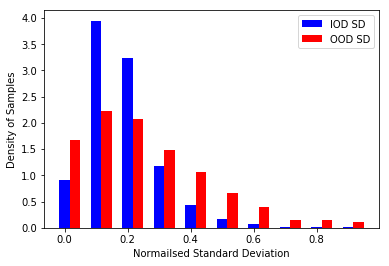

In [63]:
sd_test_IOD_df = pd.DataFrame(sd_test_IOD)
sd_test_OOD_df = pd.DataFrame(sd_test_OOD)
new_scores = np.concatenate([sd_test_IOD_df[0], sd_test_OOD_df[0]], axis=0)
minmaxscaler = MinMaxScaler()
new_scores_scaled = minmaxscaler.fit_transform(new_scores.reshape(-1, 1))

new_labels = np.concatenate([np.zeros_like(sd_test_IOD_df[0]), np.ones_like(sd_test_OOD_df[0])], axis=0)
histogram_df = pd.DataFrame(new_scores_scaled, new_labels)

#histogram_df.hist(column=0)

#sd_test_IOD_df.hist(column=0)
#sd_test_OOD_df.hist(column=0)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(minmaxscaler.fit_transform(sd_test_IOD_df[0].values.reshape(-1, 1)), density=True)
b_heights, b_bins = np.histogram(minmaxscaler.fit_transform(sd_test_OOD_df[0].values.reshape(-1, 1)), bins=a_bins, density=True)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width = width, facecolor='blue',label="IOD SD")
ax.bar(b_bins[:-1]+width, b_heights, width = width, facecolor='red', label="OOD SD")
ax.legend()
ax.set_xlabel("Normailsed Standard Deviation")
ax.set_ylabel("Density of Samples")


0.5692540486653646


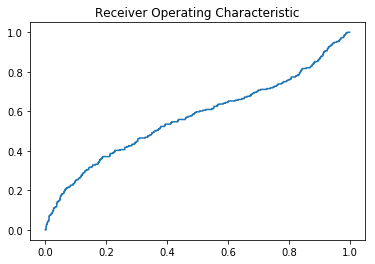

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score
norm_scores = new_scores - min(new_scores) / (max(new_scores) - min(new_scores))

auc = roc_auc_score(new_labels, new_scores)
fpr, tpr, threshs = roc_curve(new_labels, norm_scores, drop_intermediate=True)
print(auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

mean_test, sd_test = ensemble_model.predict(x_test)
mean_test = q_scaler.inverse_transform(mean_test)
#sd_test_IOD = q_scaler.inverse_transform(sd_test_IOD)
q_unorm = q_scaler.inverse_transform(q_test)

mean_test_df = pd.DataFrame(mean_test)
sd_test_df = pd.DataFrame(sd_test)
q_df = pd.DataFrame(q_test)

MEAN = np.array(mean_test_df[0])
SD = np.array(sd_test_df[0])
Q = np.array(q_df[0])
Q = Q.reshape(-1, 1)


mean_scaler = MinMaxScaler()
MEAN = mean_scaler.fit_transform(MEAN.reshape(-1, 1))
sd_scaler = MinMaxScaler()
SD = sd_scaler.fit_transform(SD.reshape(-1, 1))

MSE = np.square(np.subtract(Q, MEAN))
plt.figure()

plt.scatter(SD, MSE)
plt.xlabel('Standard Deviation')
plt.ylabel('MSE')
#plt.savefig("./Art.pdf")
plt.show()